Positive charge is indicated by blue circle. Negative charge is indicated by red circle

Change the magnitudes of the charges using the sliders


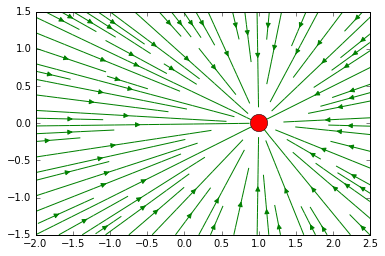

In [2]:
""" References: 
  1. dominodatalab: Building Interactive Dashboards with Jupyter
  2. Number Crunch blog: Visualizing streamlines
 
  Field at x, due to point charges at x and y
 
            Exy =        q*r
                    _________________  
    
                     4*π*ε * |r|^1.5
                
           (1/4*π*ε) is approximately equal to 9 x 10^-9
"""        
%matplotlib inline
# c.InlineBackend.figure_format
# import mpld3
# mpld3.enable_notebook()



from ipywidgets import *
from pylab import *

class charge:
    """ This defines the type of charges (Positive or Negative) and their positions
        in 2D plane.
    """
    def __init__(self, q, pos):    
        self.q=q
        self.pos=pos
 
def E_point_charge(q, pos, x, y):
    """Calculates electric field intensity due to the single or two point charges
         
     Params:
           q: charge value
           x, y : points in 2D plane
           
     Returns:
           Ex, Ey: Field intensity at points x and y respectively
               
    """
    Ex = (9e-9)*q*(x-pos[0])/((x-pos[0])**2+(y-pos[1])**2)**(1.5)
    Ey = (9e-9)*q*(y-pos[1])/((x-pos[0])**2+(y-pos[1])**2)**(1.5) 

    return Ex, Ey
         
def E_total(x, y, charges):
    """Returns list of total electric field intensity at each 2D point in the plane
    
    Params:
          x, y: points in 2D plane
          charges: type of charge and has position of the charge
          
    Returns:
          Field intensity at Ex and Ey as a list
          
    """
    Ex, Ey = 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y)
        Ex += E[0]
        Ey += E[1]
    return [ Ex, Ey ]

def plot_field_lines(q1_value, q2_value):
    """Plots electric field lines using streamline plot
    
    Params:
          q1_value, q2_value: magnitude of charges q1 and q2 with direction
        
    Returns:
          Field lines of q1 and q2
          
    """
    charges = [ charge(q1_value, [-1, 0]), charge(q2_value, [1, 0]) ]
    
    for C in charges:
        if C.q>0:
            plot(C.pos[0], C.pos[1], 'bo', ms=8*sqrt(C.q))
        if C.q<0:
            plot(C.pos[0], C.pos[1], 'ro', ms=8*sqrt(-C.q))

    x0, x1 = -2, 2.5
    y0, y1 = -1.5, 1.5
    x = linspace(x0, x1, 100)
    y = linspace(y0, y1, 100)

    x, y = meshgrid(x, y)

    Ex, Ey = E_total(x, y, charges)
    streamplot(x, y, Ex, Ey, color='g')
    draw()
    
    print "Positive charge is indicated by blue circle. Negative charge is indicated by red circle\n"
    print "Change the magnitudes of the charges using the sliders"

interact(plot_field_lines, q1_value=(-20,20,0.1), q2_value=(-20,20,0.1))    

